In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
ratings = pd.read_csv("ml-latest-small/ratings.csv")

In [14]:
movies = pd.read_csv("ml-latest-small/movies.csv")

In [15]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
ratings = ratings.drop(["timestamp"],axis=1)
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [12]:
ratings = ratings.pivot_table(index=["userId"], columns=["movieId"], values="rating")

In [58]:
ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
rate = ratings.fillna(2)
rate.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,2.0,4.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
5,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [98]:
rate.tail()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
606,2.5,2.0,2.0,2.0,2.0,2.0,2.5,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
607,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
608,2.5,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
609,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
610,5.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [17]:
import sklearn.metrics.pairwise as prwise

In [27]:
sim = prwise.cosine_similarity(rate)

In [29]:
simmat = pd.DataFrame(sim)

In [31]:
simmat.head()

,0,1,2,3,4,5,6,7,8,9,...,600,601,602,603,604,605,606,607,608,609
0,1.000000,0.981828,0.981194,0.976653,0.982539,0.975190,0.979948,0.982562,0.982118,0.977731,...,0.977402,0.981111,0.956913,0.980522,0.979836,0.955588,0.979589,0.969398,0.982973,0.949090
1,0.981828,1.000000,0.996152,0.987492,0.996359,0.987638,0.992206,0.996410,0.996507,0.993379,...,0.992141,0.993588,0.964570,0.994930,0.992587,0.965041,0.989118,0.976851,0.997561,0.959287
2,0.981194,0.996152,1.000000,0.986895,0.995639,0.986733,0.991622,0.995640,0.995927,0.992554,...,0.990052,0.992796,0.964020,0.994359,0.992068,0.963794,0.988382,0.975567,0.996928,0.957553
3,0.976653,0.987492,0.986895,1.000000,0.988117,0.979391,0.984509,0.987420,0.987405,0.984173,...,0.982573,0.985873,0.964317,0.986124,0.984672,0.961544,0.981788,0.969304,0.988481,0.951523
4,0.982539,0.996359,0.995639,0.988117,1.000000,0.989424,0.992375,0.997459,0.996108,0.992781,...,0.990946,0.995453,0.965411,0.995589,0.993033,0.965881,0.989731,0.976992,0.997799,0.958077


In [42]:
rate0 = ratings.fillna(0)

In [61]:
rate0.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [43]:
sim0 = pd.DataFrame(prwise.cosine_similarity(rate0))
sim0.head()

,0,1,2,3,4,5,6,7,8,9,...,600,601,602,603,604,605,606,607,608,609
0,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
1,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
2,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
3,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
4,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


In [44]:
sim0.median().head()

0    0.122640
1    0.029018
2    0.003531
3    0.077624
4    0.091391
dtype: float64

In [48]:
sim0.mean().head()

0    0.222627
1    0.221959
2    0.196021
3    0.192155
4    0.266728
dtype: float64

In [52]:
meanvals = []
medianvals = []
fillval = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for i in range(len(fillval)):
    rate0 = ratings.fillna(fillval[i])
    sim0 = pd.DataFrame(prwise.cosine_similarity(rate0))
#     sim0.head()
    meanvals.append(sim0.mean()[0])
    medianvals.append(sim0.median()[0])

(0, 1)

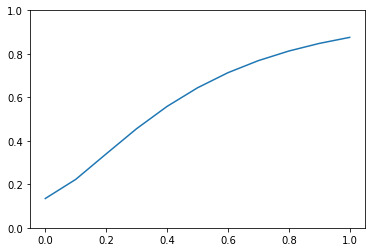

In [56]:
plt.plot(fillval,meanvals)
plt.ylim(0,1)

(0, 1)

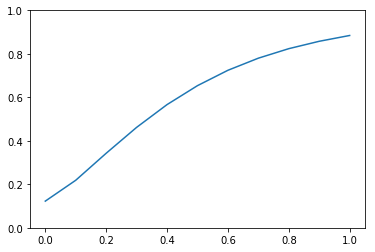

In [57]:
plt.plot(fillval,medianvals)
plt.ylim(0,1)

In [102]:
rateDefault[90]

KeyError: 90

In [63]:
rateDefault = ratings.fillna(0)
rateDefault.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
simDef = prwise.cosine_similarity(rateDefault)
simDef = pd.DataFrame(simDef)
simDef.head()

,0,1,2,3,4,5,6,7,8,9,...,600,601,602,603,604,605,606,607,608,609
0,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
1,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
2,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
3,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
4,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


In [82]:
topn = sorted([(simDef[0][i],i) for i in range(609)], reverse = True)[1:11]
topn

[(0.3574077096032742, 265),
 (0.35156151849095685, 312),
 (0.3451270515835304, 367),
 (0.3450342788075837, 56),
 (0.3347269204181708, 90),
 (0.3306643150652009, 468),
 (0.32978223365752674, 38),
 (0.32969952928292884, 287),
 (0.3280483444245288, 451),
 (0.32792168977722036, 44)]

In [94]:
topn[0][1]
topsimilar = [topn[i][1] for i in range(10)]
topsimilar

[265, 312, 367, 56, 90, 468, 38, 287, 451, 44]

In [96]:
toprated = rateDefault[topsimilar]

KeyError: '[56 90] not in index'

In [83]:
col = rateDefault.columns.values

In [90]:
newmovies = []
for i in range(10):
    templis = []
    for j in col:
        if rateDefault[1][topn[i][1]] > 2:
            templis.append(j)
    newmovies.extend(templis)
#     newmovies.extend([j for j in col if rateDefault[topn[i][1]][j] > 2])

In [92]:
len(set(newmovies))

9724